# Lab 3 - Twin and control

In this lab we will learn an model of the pendulum either with your own data or for now artificial data. 
You will need the implementation of the motor class from lab 1 in this lab.

The following things will be done in this lab:

* Learn a model of a the pendulum with curve fitting an Neural network
* Experiment with the amount and values of data 
  
    The control problem is split up in 2 parts: swing up and balance.  
    For the swing up control part:   
     
     
* Implement the motor class and evaluate the best first motor action
* Sequentially do this for every new state of the pendulum until the angle is pi radius
     
    For the balance part:  
         
         
* Implement and experiment with PID control
* Evaluate the movement of pivot point (what is the range)


In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.neural_network import MLPRegressor
import math

In [46]:
# change these parameters to more realistic values
mu = 0.3
L = 3
g = 9.8

In [47]:
# To make use of scipy.optimize curve_fit this is the form we should present the model
# watch https://www.youtube.com/watch?v=tl5QNhSe0Yk to fresh up your knowledge on curve fitting
def model(X, mu, L, g):
    theta, theta_dot = X
    result = [-mu*theta_dot[i] - (g/L)*(math.sin(theta[i])) for i in range(len(theta))]
    return result

# ''' return the angular acceleration of the pendulum theta is the angle, thata dot the angular velocity''' 
# (g/L should be in brackets)

If you make use of your own created data from the pendulum,  
you will need to calculate the angular speed so that you will have both state parameters.  
Here we will create some noisy data: that we can use for curve fitting.

In [48]:
# Some artificially noisy data to fit, x and y are theta and theta_dot and z is the model output (theta double dot) with some noise. 
# change the g_range to give the data generation a broader scope of values. Experiment with the effect.

g_range = 5.
data_size = 200

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)#theta
y = np.linspace(-g_range,g_range, data_size)  # theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

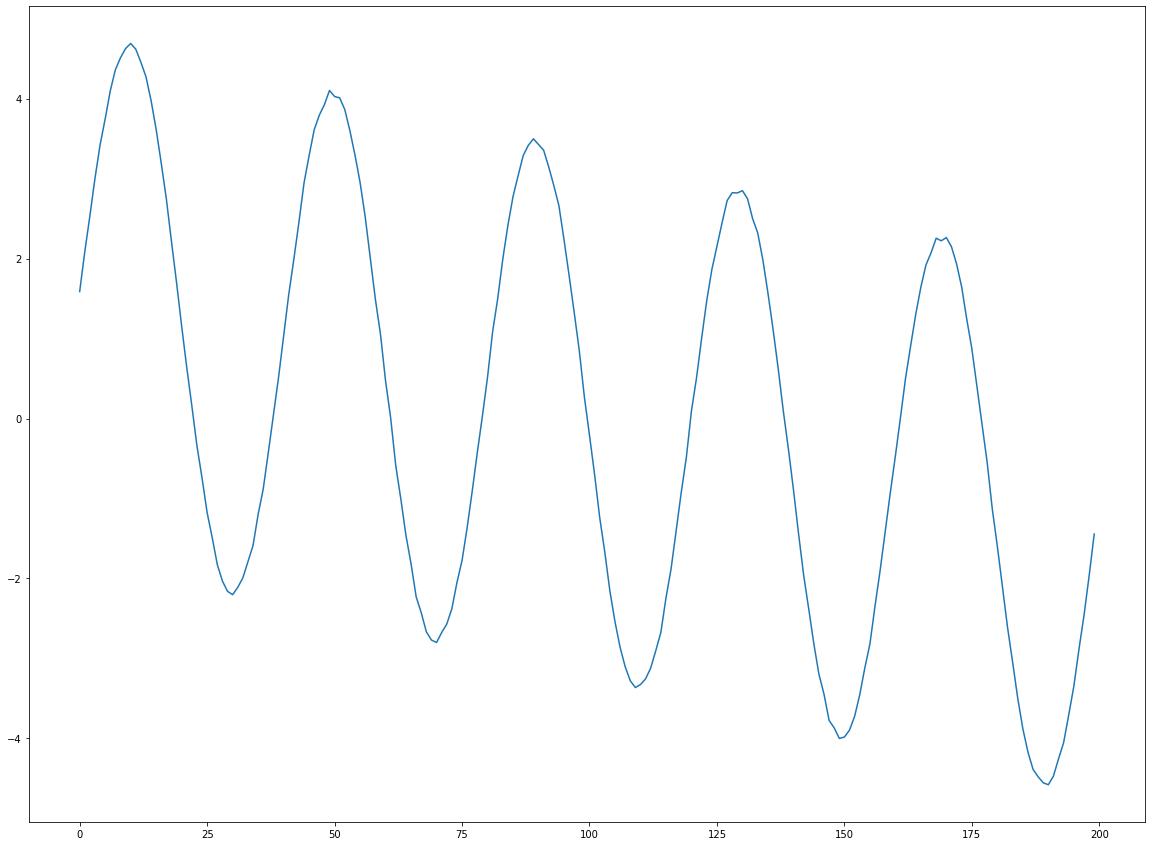

In [49]:
plt.figure(figsize=(20,15))
plt.plot(z)

In [53]:
#these are your initialization values of the model parameters (mu, L, g)
p0 = 2.5, 2., 9.8
#fit function with some initial parameters for mu, L and g
f = curve_fit(model, (x,y), z, p0)#we fit the function model to the data x, y and z
print(f[0])
print('g/L:', f[0][2]/f[0][1])

[2.99798725e-01 9.03404318e+02 2.95392098e+03]
g/L: 3.2697662793947466


In [11]:
f 

(array([3.00688262e-01, 8.04720730e+02, 2.62735924e+03]),
 array([[ 2.15494230e-06, -1.02199509e+04, -3.33673817e+04],
        [-1.02199509e+04,  1.89776670e+16,  6.19606722e+16],
        [-3.33673813e+04,  6.19606722e+16,  2.02296989e+17]]))

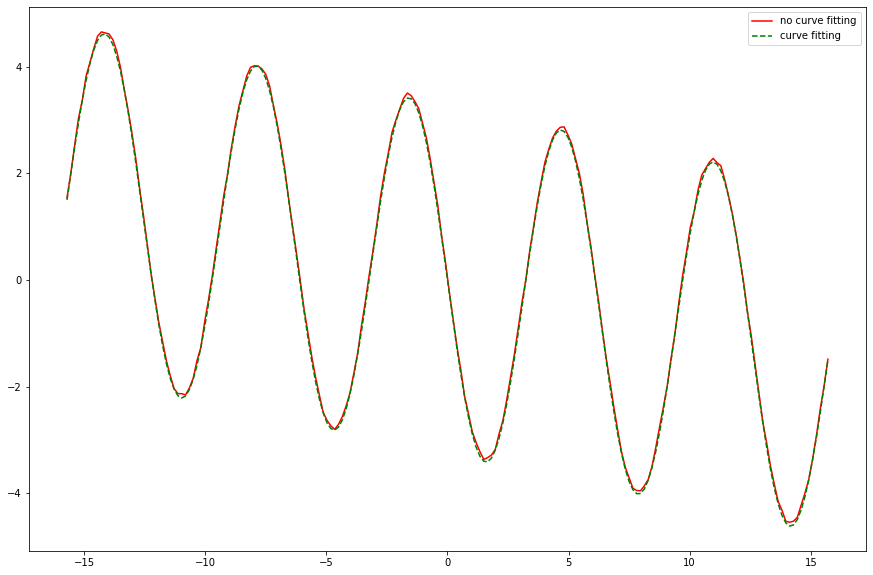

In [12]:
plt.figure(figsize=(15,10))
plt.plot(x,z,'r-',label='no curve fitting')#theta double dot with noise
plt.plot(x,model((x,y), *f[0]), 'g--', label='curve fitting')#theta double dot with parameters from curve fitting
plt.legend()
plt.show()

**1. Question [5 points]:** Plot different learned model parameters by increasing the amount of data. Explain what you see. Wich parameter can we fit and wich one not? come up with an explanaition. For every combination of learned g and L calculate the ratio. 

*The data was increased gradually. The range was increased gradually as well.
The pendulum is moving more, increasing and decreasing its angular acceleration faster. The origin data is more similar to the fitted data, making the noise less visible. g and L have the same ratio but their values increase proportionally. mu values remain almost constant (0.3)*

mu  0.30063142862668146
L  3794.5876338516464
g  12373.344853868919
g/L: 3.260787745020272
L/9.8  0.3061224489795918


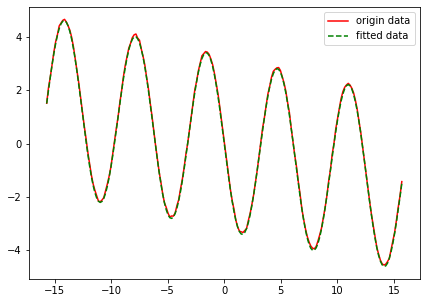

mu  0.2999033599386121
L  -5360.431871038356
g  -17504.02400749004
g/L: 3.26541301682459
L/9.8  0.3061224489795918


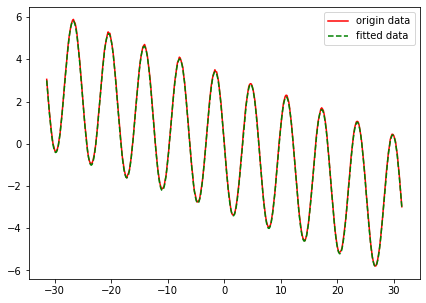

mu  0.2999884014682111
L  7028.805357277907
g  22955.581698577167
g/L: 3.2659293481228695
L/9.8  0.3061224489795918


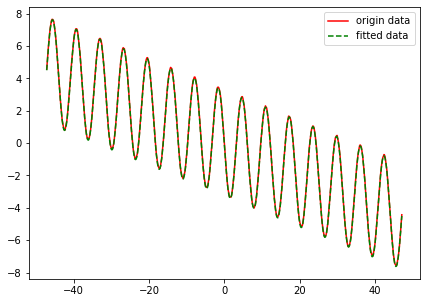

In [54]:
for i in range(1,4,1):
    g_range = i*5.
    data_size = i*200

    x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
    y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
    z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) /10# theta_double_dot with some noise

    #these are your initialization values of the model parameters (mu, L, g)
    p0 = 2.5, 2., 9.8
    #fit function with some initial parameters for mu, L and g
    f = curve_fit(model, (x,y), z, p0)
    print('mu ',f[0][0])
    print('L ',f[0][1])
    print('g ',f[0][2])
    print('g/L:',f[0][2]/f[0][1])
    print('L/9.8 ',L/9.8)

    plt.figure(figsize=(7,5))
    plt.plot(x,z,'r-',label='origin data')
    plt.plot(x,model((x,y), *f[0]), 'g--', label='fitted data')
    plt.legend()
    plt.show()

**2.Question [5 points]:** Randomly initialize p0 200 times and apply the curve_fit.  
Explain the results and plot the parameters as below.  

*The ratio g/L barely variates in the 200 simulations (it is always around 3.26). The value of mu is always around 0.3. It doesn't seem to matter very much what values we choose for initializing the curve_fit algorithm*

In [55]:
g_range = 20.
data_size = 800

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

#these are your initialization values of the model parameters (mu, L, g)
f = []
for i in range(200):
    p0 = np.random.random(), np.random.random(), np.random.random()
    f.append(curve_fit(model, (x,y), z, p0))

In [56]:
p0_mu = [(f[i][0][0]) for i in range(200)]#200 values of mu
p0_g = [f[i][0][2] for i in range(200)]#200 values of g
p0_L = [f[i][0][1] for i in range(200)]#200 values of L

p0_g = np.asarray(p0_g)
p0_L = np.asarray(p0_L)

In [26]:
print(p0_g/p0_L)

[3.2665373  3.26653566 3.26653739 3.26653394 3.26654363 3.26653557
 3.26653558 3.26653571 3.26653563 3.26653518 3.26653584 3.26653542
 3.26653559 3.26653596 3.26653522 3.26653611 3.26653695 3.26653479
 3.26653578 3.26653547 3.26653548 3.26653494 3.26653545 3.26653463
 3.26653419 3.2665366  3.26653699 3.2665357  3.26653482 3.26653527
 3.2665348  3.26653457 3.26653738 3.26653191 3.26653556 3.26653501
 3.26653597 3.26653597 3.26653462 3.26653583 3.26653596 3.26653389
 3.26653623 3.26653597 3.26653195 3.26653656 3.26653687 3.26653564
 3.26653481 3.26653404 3.26653609 3.26653453 3.26653601 3.26653407
 3.26653663 3.266534   3.26653493 3.26653677 3.26653551 3.26654006
 3.26653555 3.26653528 3.26653565 3.26653622 3.26653512 3.26653571
 3.26653664 3.26653712 3.26653597 3.26653528 3.26653737 3.26653425
 3.26653553 3.26653473 3.2665366  3.26653788 3.26653562 3.26653426
 3.26653503 3.2665363  3.26653408 3.26653293 3.26653497 3.26653429
 3.26654118 3.26653565 3.26653585 3.2665354  3.26653676 3.2665

In [25]:
print(p0_mu)

[0.30007588639818245, 0.3000758864010815, 0.30007588644255695, 0.30007588641924676, 0.30007588640011157, 0.3000758864254155, 0.3000758864024312, 0.30007588635599414, 0.3000758864176443, 0.300075886457987, 0.3000758864472498, 0.3000758863971044, 0.3000758863962485, 0.3000758863966481, 0.30007588641321353, 0.3000758864360418, 0.3000758863922154, 0.30007588636953114, 0.30007588639088156, 0.3000758864086594, 0.30007588640446475, 0.3000758864911645, 0.30007588640857075, 0.3000758864088599, 0.3000758865243695, 0.30007588639654, 0.30007588647027605, 0.30007588641437566, 0.30007588636372934, 0.30007588642104044, 0.3000758863436577, 0.30007588647327804, 0.3000758863870626, 0.30007588637659266, 0.3000758864232641, 0.30007588641055694, 0.30007588647422434, 0.3000758864293427, 0.30007588639755445, 0.3000758864524895, 0.3000758863575703, 0.3000758864073667, 0.3000758863444187, 0.30007588639139765, 0.3000758864574595, 0.3000758863668577, 0.3000758863899708, 0.3000758864519222, 0.30007588639653077, 0

(array([ 2.,  1.,  0.,  3.,  2.,  2., 21., 39., 50., 45., 15., 13.,  1.,
         1.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([3.26652964, 3.26653033, 3.26653103, 3.26653173, 3.26653243,
        3.26653313, 3.26653383, 3.26653453, 3.26653523, 3.26653593,
        3.26653663, 3.26653733, 3.26653803, 3.26653873, 3.26653943,
        3.26654013, 3.26654083, 3.26654153, 3.26654223, 3.26654293,
        3.26654363]),
 <a list of 20 Patch objects>)

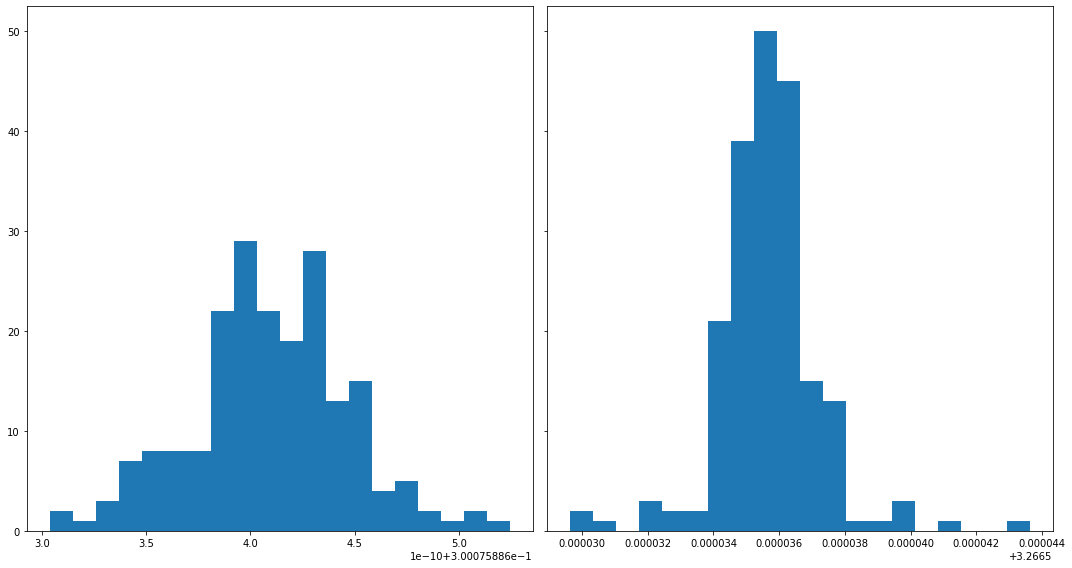

In [27]:
# Show histogram of values from randomly learning 
#we have now 200 different values for mu, L and g. We are going to represent them in histograms in 100 bins
n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15,8))
axs[0].hist(p0_mu, bins=n_bins)
axs[1].hist((p0_g/p0_L), bins=n_bins)

Now we are going to train a neural network to learn the model. 
**3.Question [5 points]:** Experiment with the model hidden_layer_sizes and evaluate the predictions to the actual values using least_squered_error. What is the best model that you found? Also experiment with the alpha > this is a so called regularization term that penalizes large parameter values in the model. check out sklearn for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [57]:
X = list(zip(x,y)) # theta, theta_dot
Y = z # theta_double_dot + noise
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(900, 900), random_state=1)# I need to variate  hidden_layer_sizes and random_state: 
#https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning
clf.fit(X, Y)
print(clf.predict([X[0]]))

[5.77325546]


In [59]:
X = list(zip(x,y)) # theta, theta_dot
Y = z # theta_double_dot+noise
clf = MLPRegressor(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(900, 900), random_state=1)# I need to variate  hidden_layer_sizes and random_state: 
#https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning
clf.fit(X, Y)
print(clf.predict([X[0]]))

[5.7722259]


In [30]:
Y[0]

6.045897219441835

In [83]:
g = 9.8
L = 1
mu = 0.5

# add the new accelration parameter
def get_theta_double_dot(theta, theta_dot):
    theta_dot_dot = (-1) * ( g/L ) * np.sin(theta) - mu * theta_dot
    return theta_dot_dot

In [84]:
get_theta_double_dot(-np.pi, -1.)

0.5000000000000012

In [80]:
X = list(zip(x,y)) # theta, theta_dot
Y = z # theta_double_dot
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)# I need to variate  hidden_layer_sizes and random_state
clf.fit(X, Y)
print(clf.predict([[-66, -20.0]]))

[3.07485395]


In [75]:
X[0]

(-62.83185307179586, -20.0)

In [79]:
#We check if this prediction is accurate
Y[0]

6.085633620903742

In [60]:
y_predict = clf.predict(X)
y_true = Y

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_predict)#the smallest is the MSE the better is the parameter choice of the MLPRegressor algorithm

5.261147023520578

**4.Question [5 points]:** now visualize the phase portrait as learned with the neural network  
and inspect where the behaviour seems to be predicted correct and incorrect.

In [55]:
y_predict.shape

(201,)

In [62]:
v = y_predict
V = np.reshape(v,(-1, 1))
V.shape

(800, 1)

In [63]:
x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
X, Y = np.meshgrid(x, y)
U=np.zeros(X.shape)
V=np.zeros(Y.shape)
t=0.01
print(X.shape)
print(U.shape)

(800, 800)
(800, 800)


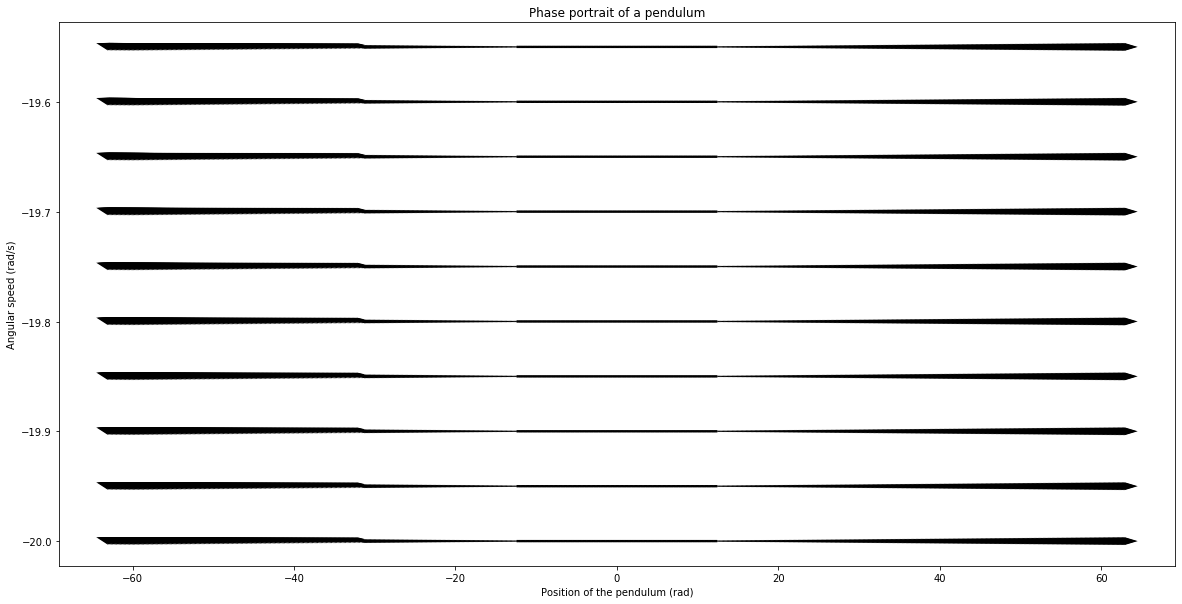

In [64]:
x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot

X, Y = np.meshgrid(x, y)
U=np.zeros(X.shape) # U is theta_dot
V=np.zeros(Y.shape) # theta_double_dot
t=0.01


theta_dot,theta_double_dot = y, y_predict
for i in range(201):
    U[i] = theta_dot  
    V[:,i] = theta_double_dot
            
fig, ax = plt.subplots(figsize=(20, 10))
M = ax.quiver(X[:10], Y[:10], U[:10], V[:10])
ax.set_title('Phase portrait of a pendulum')
ax.set_ylabel('Angular speed (rad/s)')
ax.set_xlabel('Position of the pendulum (rad)')
ax.quiverkey(M, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
plt.show()

(800,)
(800,)
(800, 800)
(800, 800)


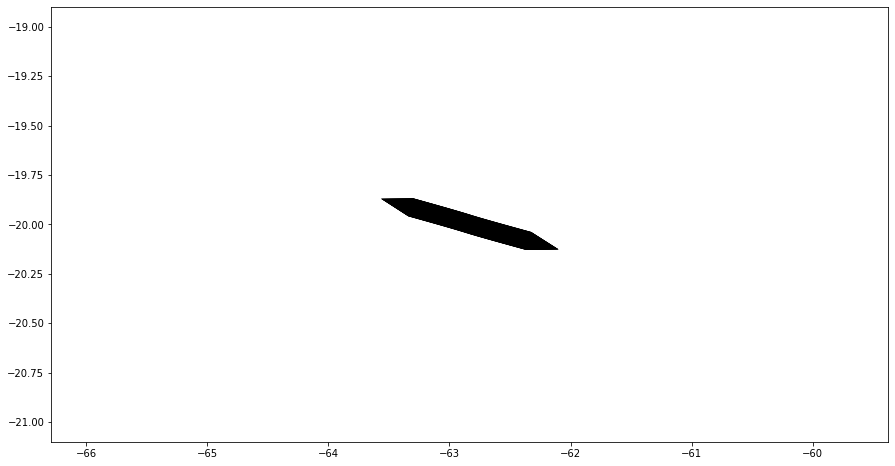

In [65]:
#And example of how to display the estimated direction of angular behaviour (phase portrait)
X = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
Y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
v = y_predict
# V is theta_double_dot
v = np.reshape(v,(-1, 1)) # 201, 1
V = v
for i in range(len(X)-1):
    V = np.vstack((V,v))
V = np.reshape(V, (Y.shape[0], X.shape[0]))

# U is theta_dot
u = np.reshape(Y, (-1, 1))
U = u
for i in range(len(X)-1):
    U = np.vstack((U,u))
U = np.reshape(U, (Y.shape[0], X.shape[0]))
print(X.shape)
print(Y.shape)
print(U.shape)
print(V.shape)
fig, ax = plt.subplots(figsize = (15,8))
q = ax.quiver(X[:1], Y[:1], U[:1], V[:1])
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
plt.show()


# Controls
from lab one you'll need a couple of things. Namly the motor class and get_theta_double_dot_with_a.

In [ ]:
def get_theta_double_dot_with_a(theta, theta_dot, a_motor):
    return ''' return the angular acceleration of the pendulum. '''  

In [ ]:
class Motor_Acc:
    def __init__(self, direction, speed, duration):
        self.direction = direction
        self.speed = speed
        self.duration = duration
        self.time = 0
        self.func = self.create_func()
    
    def create_func(self):
        ''' Create a list of acceleration values so that every step correspons to a step in simulation.
        Use the direction, speed and duration to create this list.
        In a next Lab we will use the data of the prototype to fit a function. 
        If you want to create a function now, that is fine.
        '''
        return func_list #or some function
        
    def tik(self):
        '''
        return the acceleration at a given time and shift the time
        '''
        self.time = self.time + 1
        if self.time < self.duration:
            return self.func[self.time]
        else:
            return 0. #return an acceleration of 0
    
    def set_motor(self, direction, speed, duration):
        self.direction = direction
        self.speed = speed
        self.duration = duration
        self.time = 0
        self.func = self.create_func()

In [ ]:
def state_with_motor(t):
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = 0.1
    for time in np.arange(0,t,delta_t):
        a_of_motor = motor.tik()
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a_of_motor)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
    return theta, theta_dot

**Question [5 points]:** Add multiple configurations to estimate the best first motor action to choose.   
Do this by simulating and saving the final angle and angular speed.  
The largest angular speed will give you the best move.  
However due to constrains in the real world, you now need to also keep track of the pivot location.

**Question [5 points]:** Evaluate what the new location of the pivot point will be.   
You can calculate with the use of the acceleration profile of the motor control.    
Is this acceptable? If not find and acceptable move.

In [ ]:
directions = [...,...]
speeds = [...,...]
durations = [...,...]

outcomes = []
# Initial conditions of pendulum
THETA_0 = 0
THETA_DOT_0 = 0

for n in range(x):
    motor = Motor_Acc(directions[n], speeds[n], duration[n])
    theta, theta_dot = state_with_motor(duration[n]) #+some delay if you moddeld a delay from trigger point to actuation.
    outcomes.append([theta, theta_dot])

**Question [5 points]:** Now save the new theta and theta_dot that are the best motor action and start the same process again.  
repeat until the theta is close to pi (+-3).

Now for the upward balance we will do with PID control.  
This video might help you to understand PID: https://www.youtube.com/watch?v=UR0hOmjaHp0  
Now the problem of control is a continues one so we can ignore using the motor class for now.

In [ ]:
def pid_control(t, THETA_0,THETA_DOT_0, a, goal):
    theta = THETA_0
    theta_dot = THETA_DOT_0
    list_t = []
    list_e = []
    delta_t = 0.01#choose a delta in time to compute
    for time in np.arange(0,t,delta_t):
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        
        error= goal-theta
        
        p = ...
        i = ...
        d = ...
        
        if len(list_td)>0:
            # We need at least one step in simulation to be able to make use of an Integral or derivative component.
            a = p*error + i*(error_sum) + d*(error-previous_error)
        else:
            # the first step can only be a Proportional change
            a = p*error
        list_t.append(theta)
        list_e.append(error)
        print(a)
    return list_t, list_e

In [ ]:
#lest say we start with an acceleration of 0
# for now we manipulate a directly to get an idea of how we should control things.
a = 0
simulation_time = 20
# we now simulate what happens over time with theta and the error. 
# The error is the difference between the goal of pi radius and the actual theta. 
theta_list,error_list = pid_control(simulation_time, np.pi-0.03, -0.01, a, np.pi)

plt.plot(range(len(theta_list)), theta_list)
plt.show()

**Question [5 points]:** What type of controller do we need P? PD? PI? or PID? explain why.

Now the goal of a PID is to stabilize a system, hopefully as quick as possible.  
**Question [5 points]:** Implement the controller, explore different settings.  
Find the settings so that the model can be controlled in the range of pi-0.1 until pi+0.1

**Question [5 points]:** Now also return the list of a values in the function pid_control and calculate and plot the pivot location over time. Is this acceptable or is it necessary to change the controls because the deflections are to large?